### object detection

In [33]:
import torch
import torch.nn as nn

import torchvision
from torchvision.io.image import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image
import torchvision.transforms.v2 as v2
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader 

from PIL import Image

In [1]:
# https://ai.meta.com/blog/segment-anything-2/
# https://blog.roboflow.com/

In [2]:
# https://app.cvat.ai/tasks -> 여기서 이미지와 비디오에 라벨을 붙이기
# project, tesk 만들기 & menu -> Export job dataset -> coco1.0
# 다운로드하면 json파일이 나옴, json reader로 읽기 -> annotation > bbox

# object detection tutorial
# https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html
# PennFudan 데이터세트에 대한 데이터세트를 작성 : https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip

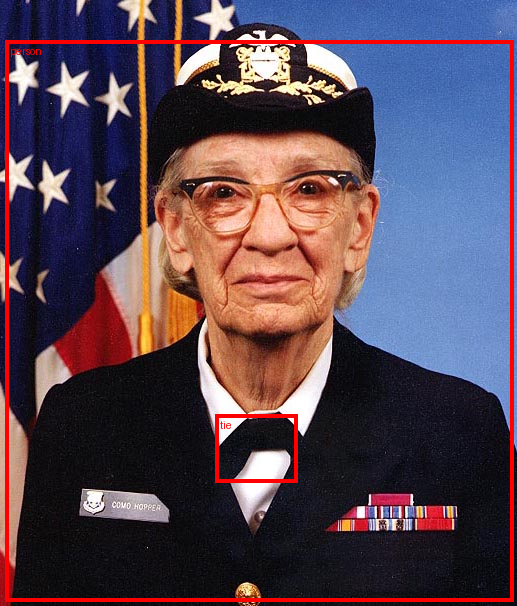

In [12]:
# https://pytorch.org/vision/stable/models.html#object-detection-instance-segmentation-and-person-keypoint-detection

img = read_image("grace_hopper_517x606.jpg")

# Step 1: Initialize model with the best available weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model.eval() # 모델을 학습시키지 않겠다는 의미 (그 layer를 skip함)

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
# (이미지 출력하는 과정)
prediction = model(batch)[0]
labels = [weights.meta["categories"][i] for i in prediction["labels"]] # 예측된 객체의 클래스 인덱스 리스트 (해당 클래스 이름을 가져와 labels 리스트를 만듦)
box = draw_bounding_boxes(img, boxes=prediction["boxes"], # 이미지 위에 바운딩 박스를 그림
                          labels=labels, # 라벨 표시
                          colors="red",
                          width=4, font_size=30)
im = to_pil_image(box.detach()) # 텐서를 PIL 이미지로 변환
im

In [5]:
# Step 1: Initialize model with the best available weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

In [6]:
weights.transforms()

ObjectDetection()

In [7]:
batch = [preprocess(img)]
batch[0].shape

torch.Size([3, 606, 517])

In [9]:
weights.meta["categories"]

['__background__',
 'person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'N/A',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'N/A',
 'backpack',
 'umbrella',
 'N/A',
 'N/A',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'N/A',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'N/A',
 'dining table',
 'N/A',
 'N/A',
 'toilet',
 'N/A',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'N/A',
 'book',
 'clock',
 'vase',
 'scissors',
 'ted

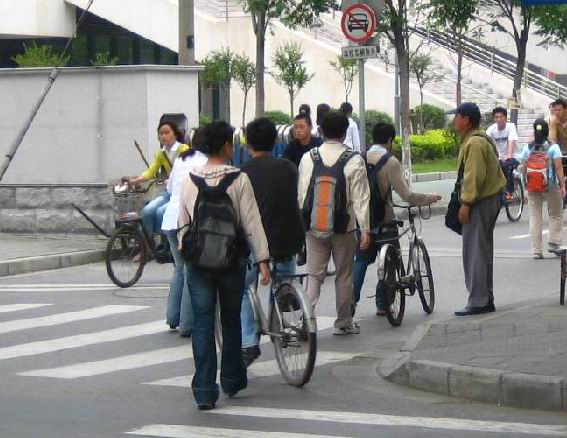

In [13]:
img_path = "data/PennFudanPed/PNGImages/FudanPed00046.png"
image = Image.open(img_path)
image

In [15]:
# https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html

import os
import torch

from torchvision.io import read_image
from torchvision.ops.boxes import masks_to_boxes
from torchvision import tv_tensors
from torchvision.transforms.v2 import functional as F


class PennFudanDataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms):
        self.root = root
        self.transforms = transforms
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = list(sorted(os.listdir(os.path.join(root, "PNGImages"))))
        self.masks = list(sorted(os.listdir(os.path.join(root, "PedMasks"))))

    def __getitem__(self, idx):
        # load images and masks
        img_path = os.path.join(self.root, "PNGImages", self.imgs[idx])
        mask_path = os.path.join(self.root, "PedMasks", self.masks[idx])
        img = read_image(img_path)
        mask = read_image(mask_path)
        # instances are encoded as different colors
        obj_ids = torch.unique(mask)
        # first id is the background, so remove it
        obj_ids = obj_ids[1:]
        num_objs = len(obj_ids)

        # split the color-encoded mask into a set
        # of binary masks
        masks = (mask == obj_ids[:, None, None]).to(dtype=torch.uint8)

        # get bounding box coordinates for each mask
        boxes = masks_to_boxes(masks)

        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)

        image_id = idx
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        # Wrap sample and targets into torchvision tv_tensors:
        img = tv_tensors.Image(img)

        target = {}
        target["boxes"] = tv_tensors.BoundingBoxes(boxes, format="XYXY", canvas_size=F.get_size(img))
        target["masks"] = tv_tensors.Mask(masks)
        target["labels"] = labels
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.imgs)

In [29]:
my_transform = v2.Compose([
    v2.ToTensor()
])

root = "data/PennFudanPed"
dataset = PennFudanDataset(root, my_transform)

In [31]:
# https://github.com/pytorch/vision/blob/f69eee6108cd047ac8b62a2992244e9ab3c105e1/references/detection/utils.py
# utils, coco, engine, transform 다운

import utils
data_loader = DataLoader(dataset, batch_size=2, collate_fn = utils.collate_fn)
for X_train, y_label in data_loader:
    print(X_train[0].shape)
    print(X_train[1].shape)
    print(y_label)
    break

torch.Size([3, 536, 559])
torch.Size([3, 414, 455])
({'boxes': BoundingBoxes([[159., 181., 301., 430.],
               [419., 170., 534., 485.]], format=BoundingBoxFormat.XYXY, canvas_size=[536, 559]), 'masks': Mask([[[0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0],
       ...,
       [0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0]],

      [[0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0],
       ...,
       [0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8), 'labels': tensor([1, 1]), 'image_id': 0, 'area': tensor([35358., 36225.]), 'iscrowd': tensor([0, 0])}, {'boxes': BoundingBoxes([[ 67.,  92., 190., 379.]], format=BoundingBoxFormat.XYXY, canvas_size=[414, 455]), 'masks': Mask([[[0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0],
       ...,
       [0, 0, 

In [40]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor


def get_model_instance_segmentation(num_classes):
    # load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights="DEFAULT")

    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(
        in_features_mask,
        hidden_layer,
        num_classes
    )

    return model

In [35]:
from torchvision.transforms import v2 as T


def get_transform(train):
    transforms = []
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    transforms.append(T.ToDtype(torch.float, scale=True))
    transforms.append(T.ToPureTensor())
    return T.Compose(transforms)

In [36]:
import utils

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
dataset = PennFudanDataset('data/PennFudanPed', get_transform(train=True))
data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=2,
    shuffle=True,
    collate_fn=utils.collate_fn
)

# For Training
images, targets = next(iter(data_loader))
images = list(image for image in images)
targets = [{k: v for k, v in t.items()} for t in targets]
output = model(images, targets)  # Returns losses and detections
print(output)

# For inference
model.eval()
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)] # test할때 random으로
predictions = model(x)  # Returns predictions
print(predictions[0])

{'loss_classifier': tensor(0.2035, grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(0.0522, grad_fn=<DivBackward0>), 'loss_objectness': tensor(0.0354, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), 'loss_rpn_box_reg': tensor(0.0046, grad_fn=<DivBackward0>)}
{'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward0>), 'labels': tensor([], dtype=torch.int64), 'scores': tensor([], grad_fn=<IndexBackward0>)}


In [41]:
from engine import train_one_epoch, evaluate

# train on the GPU or on the CPU, if a GPU is not available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# our dataset has two classes only - background and person
num_classes = 2
# use our dataset and defined transformations
dataset = PennFudanDataset('data/PennFudanPed', get_transform(train=True))
dataset_test = PennFudanDataset('data/PennFudanPed', get_transform(train=False))

# split the dataset in train and test set
indices = torch.randperm(len(dataset)).tolist()
dataset = torch.utils.data.Subset(dataset, indices[:-50])
dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=2,
    shuffle=True,
    collate_fn=utils.collate_fn
)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=1,
    shuffle=False,
    collate_fn=utils.collate_fn
)

# get the model using our helper function
model = get_model_instance_segmentation(num_classes)

# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(
    params,
    lr=0.005,
    momentum=0.9,
    weight_decay=0.0005
)

# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=3,
    gamma=0.1
)

# let's train it just for 2 epochs
num_epochs = 2

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, data_loader_test, device=device)

print("That's it!")

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to C:\Users\user/.cache\torch\hub\checkpoints\maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100.0%
C:\practice-torch\engine.py:30: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):


Epoch: [0]  [ 0/60]  eta: 0:08:15  lr: 0.000090  loss: 6.4852 (6.4852)  loss_classifier: 0.7139 (0.7139)  loss_box_reg: 0.2361 (0.2361)  loss_mask: 5.5194 (5.5194)  loss_objectness: 0.0118 (0.0118)  loss_rpn_box_reg: 0.0040 (0.0040)  time: 8.2665  data: 0.0279
Epoch: [0]  [10/60]  eta: 0:07:24  lr: 0.000936  loss: 1.6708 (2.8545)  loss_classifier: 0.4912 (0.4554)  loss_box_reg: 0.2361 (0.2399)  loss_mask: 1.0087 (2.1309)  loss_objectness: 0.0173 (0.0229)  loss_rpn_box_reg: 0.0056 (0.0054)  time: 8.8972  data: 0.0338
Epoch: [0]  [20/60]  eta: 0:06:19  lr: 0.001783  loss: 1.0883 (1.8636)  loss_classifier: 0.2457 (0.3329)  loss_box_reg: 0.2163 (0.2405)  loss_mask: 0.4181 (1.2554)  loss_objectness: 0.0223 (0.0264)  loss_rpn_box_reg: 0.0056 (0.0084)  time: 9.5447  data: 0.0352
Epoch: [0]  [30/60]  eta: 0:04:40  lr: 0.002629  loss: 0.6234 (1.4550)  loss_classifier: 0.1309 (0.2625)  loss_box_reg: 0.2110 (0.2387)  loss_mask: 0.2478 (0.9237)  loss_objectness: 0.0168 (0.0214)  loss_rpn_box_reg: 